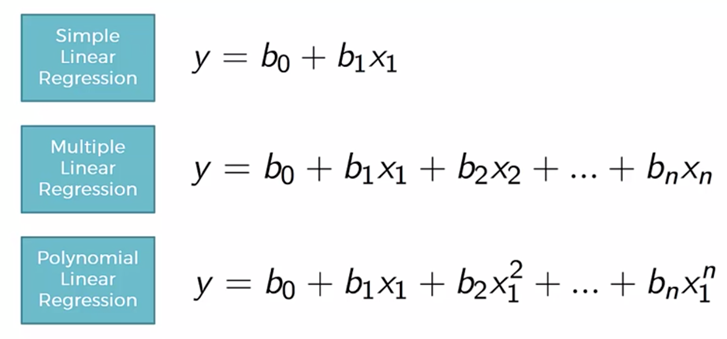

# Simple Linear Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
age = np.array([43,21,25,42,57,59])
glucose = np.array([99,65,79,75,87,81])

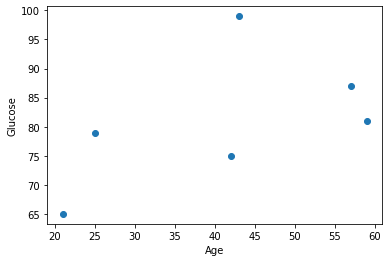

In [3]:
plt.scatter(age,glucose)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

# 
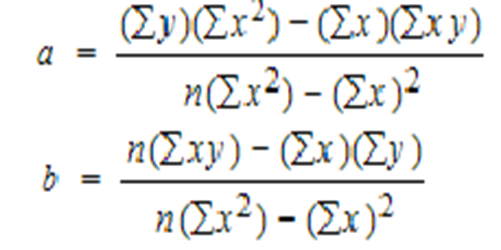

In [4]:
def cofficient(x,y):
    
    s_x = sum(x)
    s_y = sum(y)
    s_x2 = sum(x**2)
    s_xy = sum(x*y)
    n = len(x)
    
    b0 = (s_y*s_x2 - s_x*s_xy)/(n*s_x2 - (s_x)**2)
    b1 = (n*s_xy - s_x*s_y)/(n*s_x2 - (s_x)**2)
    
    return b0,b1

In [5]:
b0 = cofficient(age,glucose)[0]
b1 = cofficient(age,glucose)[1]

In [6]:
y_pred = b0+b1*age

In [7]:
y_pred

array([81.7062458 , 73.23129617, 74.7721961 , 81.32102082, 87.09939557,
       87.86984553])

In [8]:
glucose

array([99, 65, 79, 75, 87, 81])

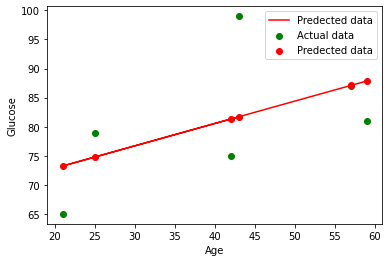

In [9]:
plt.scatter(age,glucose,color="green",label="Actual data")
plt.scatter(age,y_pred,color="red",label="Predected data")
plt.plot(age,y_pred,color="red",label="Predected data")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [10]:
age

array([43, 21, 25, 42, 57, 59])

In [11]:
new_pred = b0+b1*30
new_pred

76.69832102081935

In [12]:
glucose

array([99, 65, 79, 75, 87, 81])

# With Sciket-Learn libraries

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
x = age.reshape(-1,1)
y = glucose.reshape(-1,1)

In [15]:
x.shape

(6, 1)

In [16]:
model.fit(x,y)

LinearRegression()

In [17]:
y_pred1 = model.predict(x)

In [18]:
y_pred1

array([[81.7062458 ],
       [73.23129617],
       [74.7721961 ],
       [81.32102082],
       [87.09939557],
       [87.86984553]])

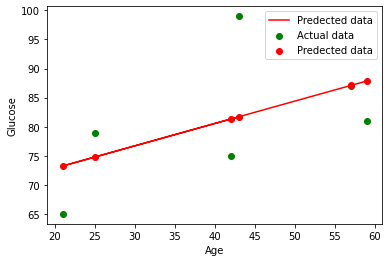

In [19]:
plt.scatter(age,glucose,color="green",label="Actual data")
plt.scatter(age,y_pred1,color="red",label="Predected data")
plt.plot(age,y_pred1,color="red",label="Predected data")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [65]:
y_hat =y_pred1[:,0]

In [66]:
y_act = glucose

In [71]:
sum((y_hat-y_act)**2)/len(y_act)

78.64374300425344

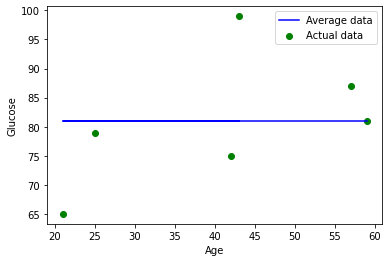

In [85]:
plt.scatter(age,glucose,color="green",label="Actual data")
plt.plot(age,[81,81,81,81,81,81],color="blue",label="Average data")
#plt.plot(age,y_pred1,color="red",label="Predected data")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [73]:
ss_res = sum((y_hat-y_act)**2)
ss_res

471.8624580255206

In [82]:
y_avg = np.mean(y_act)
ss_tot = sum((y_avg-y_act)**2)

In [83]:
acc = 1-(ss_res/ss_tot)

In [84]:
acc

0.2806974725220722

# Accuracy Testing

In [86]:
from sklearn.metrics import r2_score,mean_squared_error

In [87]:
mean_squared_error(y_act,y_hat)

78.64374300425344

In [88]:
r2_score(y_act,y_hat)

0.2806974725220722

In [89]:
print("After fiting in simple linear regression we get the accuract with same dataset is: ",r2_score(y_act,y_hat))

After fiting in simple linear regression we get the accuract with same dataset is:  0.2806974725220722


# Polynomial Linear Regression

In [136]:
age

array([43, 21, 25, 42, 57, 59])

In [137]:
glucose

array([99, 65, 79, 75, 87, 81])

In [138]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
poly_x = poly.fit_transform(x)

In [139]:
poly_x

array([[1.00000000e+00, 1.65349200e+05, 1.36897800e+05, ...,
        1.78064190e+12, 7.54854560e+06, 3.20000000e+01],
       [1.00000000e+00, 1.62597700e+05, 1.51377590e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.53441510e+05, 1.01145550e+05, ...,
        1.66410589e+11, 4.07934540e+05, 1.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.35426920e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.42050000e+02, 5.17431500e+04, ...,
        0.00000000e+00, 0.00000000e+00, 3.20000000e+01],
       [1.00000000e+00, 0.00000000e+00, 1.16983800e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [140]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [141]:
model2.fit(poly_x,y)

LinearRegression()

In [142]:
y_pred2 = model2.predict(poly_x)

In [143]:
y_pred2

array([192261.82999293, 191792.05999915, 191050.38999398, 182901.98999552,
       166187.93998994, 156991.11999456, 156122.50999401, 155752.59999452,
       152211.76999342, 149759.95999355, 146121.94999319, 144259.39999422,
       141585.51999374, 134307.34999286, 132602.64999597, 129917.03999476,
       126992.92999131, 125370.36999236, 124266.89999316, 122776.86000323,
       118474.0299901 , 111313.01998782, 110352.24999213, 108733.98998407,
       108552.03999244, 107404.33999561, 105733.54000159, 105008.30997692,
       103282.38000527, 101004.63999728,  99937.58999187,  97483.56000106,
        97427.84002182,  96778.9200144 ,  96712.80002153,  96479.51001501,
        90708.19000787,  89949.1400201 ,  81229.05999899,  81005.76000675,
        78239.91000682,  77798.82999873,  71498.49001213,  69758.98001621,
        65200.3300018 ,  64926.07998088,  49490.75002043,  42559.73000208,
        35673.41003772,  14681.40001441])

ValueError: x and y must be the same size

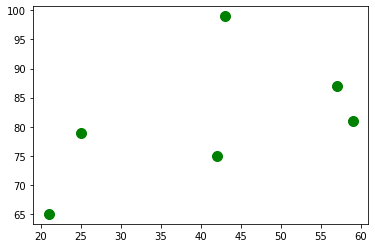

In [144]:
plt.scatter(age,glucose,color="green",s=100,label="Actual data")
plt.scatter(age,y_pred2,color="red",label="Poly Predect")
#plt.scatter(age,y_pred1,color="black",label="Simple Predect")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [145]:
from sklearn.metrics import r2_score
print("After fiting in Polynomial linear regression we get the accuract with same dataset is: ",r2_score(y,y_pred2))

After fiting in Polynomial linear regression we get the accuract with same dataset is:  1.0


# Multiple Linear Regression

In [147]:
df = pd.read_csv("50_Startups.csv")
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [149]:
import random

for i in range(400):
    n = random.randrange(0,165349)

117915

In [133]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [115]:
x = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [119]:
x["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [121]:
x["State"] = le.fit_transform(x["State"])

In [125]:
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

In [126]:
model3.fit(x,y)

LinearRegression()

In [130]:
y_pred3 = model3.predict(x)

In [131]:
for i in range(len(y_pred3)):
    print(f"Actual Data= {y[i]} :: Predicted= {y_pred3[i]}")

Actual Data= 192261.83 :: Predicted= 192502.76441568666
Actual Data= 191792.06 :: Predicted= 189182.66604536513
Actual Data= 191050.39 :: Predicted= 182150.95841892585
Actual Data= 182901.99 :: Predicted= 173677.49061830956
Actual Data= 166187.94 :: Predicted= 172142.80063001337
Actual Data= 156991.12 :: Predicted= 163561.2079575493
Actual Data= 156122.51 :: Predicted= 158138.91212502273
Actual Data= 155752.6 :: Predicted= 160023.60415541913
Actual Data= 152211.77 :: Predicted= 151721.15820901727
Actual Data= 149759.96 :: Predicted= 154909.30673999904
Actual Data= 146121.95 :: Predicted= 135510.37351800816
Actual Data= 144259.4 :: Predicted= 135597.51300262177
Actual Data= 141585.52 :: Predicted= 129138.87863060107
Actual Data= 134307.35 :: Predicted= 127510.97126515841
Actual Data= 132602.65 :: Predicted= 149550.3431040019
Actual Data= 129917.04 :: Predicted= 146214.62758874756
Actual Data= 126992.93 :: Predicted= 116937.89389795851
Actual Data= 125370.37 :: Predicted= 130170.79803396

In [132]:
from sklearn.metrics import r2_score
print("After fiting in Multiple linear regression we get the accuract with same dataset is: ",r2_score(y,y_pred3))

After fiting in Multiple linear regression we get the accuract with same dataset is:  0.9507462044842656


In [ ]:
np.random()